In [1]:
import argparse
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import tqdm 
from collections import defaultdict

from itertools import combinations

In [2]:
df = pd.read_csv('outputs/analysis_lists/all_analysis_week_12.csv')

policies = ['rmab', 'control', 'round_robin']
T = 12

engagement_matrix = {pol:[] for pol in policies}
for pol in policies:
    for week in range(T):
        df[f'mat-{week}'] = df[f'week{week}_E/C'].apply(lambda x: int(x[0]))
        mat_cols = [col for col in df.columns if col.startswith('mat')] 
        engagement_matrix[pol] = (df[df['arm']==pol][mat_cols].values>0).astype(int)

In [4]:
engagement_matrix['rmab'].shape


(7668, 12)

In [6]:
engagement_matrix['round_robin'].shape


(7668, 12)

In [8]:
engagement_matrix['rmab'].sum()/12, engagement_matrix['round_robin'].sum()/12

(3356.8333333333335, 3371.4166666666665)

In [9]:
engagement_matrix['rmab'][:, -1].sum(), engagement_matrix['round_robin'][:, -1].sum()

(3221, 3229)

In [3]:
cumm_engage_drops = {'rmab': [], 'round_robin': [], 'control': []}
inst_engage_drops = {'rmab': [], 'round_robin': [], 'control': []}

for week in range(T):
    print(f'week {week+1}')

    for pol in ['control' , 'rmab','round_robin' ]:
        r_n_0 = engagement_matrix[pol][:, 0].sum()
        cumm_rew = engagement_matrix[pol][:, :week+1].sum()
        inst_rew = engagement_matrix[pol][:, week].sum()
        
        cumm_engage_drop = cumm_rew - (week+1)*r_n_0
        inst_engage_drop = inst_rew - r_n_0
        
        cumm_engage_drops[pol].append(cumm_engage_drop)
        inst_engage_drops[pol].append(inst_engage_drop)
        
        print(pol)
        print(f'\t r_0: {r_n_0}, inst_rew: {inst_rew}', '')

week 1
control
	 r_0: 3661, inst_rew: 3661
rmab
	 r_0: 3571, inst_rew: 3571
round_robin
	 r_0: 3647, inst_rew: 3647
week 2
control
	 r_0: 3661, inst_rew: 3547
rmab
	 r_0: 3571, inst_rew: 3547
round_robin
	 r_0: 3647, inst_rew: 3522
week 3
control
	 r_0: 3661, inst_rew: 3445
rmab
	 r_0: 3571, inst_rew: 3489
round_robin
	 r_0: 3647, inst_rew: 3431
week 4
control
	 r_0: 3661, inst_rew: 3483
rmab
	 r_0: 3571, inst_rew: 3428
round_robin
	 r_0: 3647, inst_rew: 3436
week 5
control
	 r_0: 3661, inst_rew: 3350
rmab
	 r_0: 3571, inst_rew: 3300
round_robin
	 r_0: 3647, inst_rew: 3287
week 6
control
	 r_0: 3661, inst_rew: 3309
rmab
	 r_0: 3571, inst_rew: 3347
round_robin
	 r_0: 3647, inst_rew: 3367
week 7
control
	 r_0: 3661, inst_rew: 3297
rmab
	 r_0: 3571, inst_rew: 3272
round_robin
	 r_0: 3647, inst_rew: 3323
week 8
control
	 r_0: 3661, inst_rew: 3252
rmab
	 r_0: 3571, inst_rew: 3292
round_robin
	 r_0: 3647, inst_rew: 3320
week 9
control
	 r_0: 3661, inst_rew: 3258
rmab
	 r_0: 3571, inst_rew: 3

In [6]:
cumm_engage_drops = {'rmab': [], 'round_robin': [], 'control': []}
inst_engage_drops = {'rmab': [], 'round_robin': [], 'control': []}

for week in range(T):
    print(f'week {week+1}')

    for pol in ['control' , 'rmab','round_robin' ]:
        r_n_0 = engagement_matrix[pol][:, 0].sum()
        cumm_rew = engagement_matrix[pol][:, :week+1].sum()
        inst_rew = engagement_matrix[pol][:, week].sum()
        
        cumm_engage_drop = cumm_rew - (week+1)*r_n_0
        inst_engage_drop = inst_rew - r_n_0
        
        cumm_engage_drops[pol].append(cumm_engage_drop)
        inst_engage_drops[pol].append(inst_engage_drop)
        
        print(pol)
        print(f'\t r_0: {r_n_0}, inst_rew: {inst_rew}', 'cumu drop', cumm_engage_drop, 'cumu rew', cumm_rew) 

week 1
control
	 r_0: 3661, inst_rew: 3661 cumu drop 0 cumu rew 3661
rmab
	 r_0: 3571, inst_rew: 3571 cumu drop 0 cumu rew 3571
round_robin
	 r_0: 3647, inst_rew: 3647 cumu drop 0 cumu rew 3647
week 2
control
	 r_0: 3661, inst_rew: 3547 cumu drop -114 cumu rew 7208
rmab
	 r_0: 3571, inst_rew: 3547 cumu drop -24 cumu rew 7118
round_robin
	 r_0: 3647, inst_rew: 3522 cumu drop -125 cumu rew 7169
week 3
control
	 r_0: 3661, inst_rew: 3445 cumu drop -330 cumu rew 10653
rmab
	 r_0: 3571, inst_rew: 3489 cumu drop -106 cumu rew 10607
round_robin
	 r_0: 3647, inst_rew: 3431 cumu drop -341 cumu rew 10600
week 4
control
	 r_0: 3661, inst_rew: 3483 cumu drop -508 cumu rew 14136
rmab
	 r_0: 3571, inst_rew: 3428 cumu drop -249 cumu rew 14035
round_robin
	 r_0: 3647, inst_rew: 3436 cumu drop -552 cumu rew 14036
week 5
control
	 r_0: 3661, inst_rew: 3350 cumu drop -819 cumu rew 17486
rmab
	 r_0: 3571, inst_rew: 3300 cumu drop -520 cumu rew 17335
round_robin
	 r_0: 3647, inst_rew: 3287 cumu drop -912 c

In [4]:
cumm_engage_drops[pol][7]

-1843

In [5]:
for week in range(12):
    print('week ', week)
    for pol in ['control' , 'rmab','round_robin' ]:
        print('\t', pol, engagement_matrix[pol][:, week].sum())

week  0
	 control 3661
	 rmab 3571
	 round_robin 3647
week  1
	 control 3547
	 rmab 3547
	 round_robin 3522
week  2
	 control 3445
	 rmab 3489
	 round_robin 3431
week  3
	 control 3483
	 rmab 3428
	 round_robin 3436
week  4
	 control 3350
	 rmab 3300
	 round_robin 3287
week  5
	 control 3309
	 rmab 3347
	 round_robin 3367
week  6
	 control 3297
	 rmab 3272
	 round_robin 3323
week  7
	 control 3252
	 rmab 3292
	 round_robin 3320
week  8
	 control 3258
	 rmab 3288
	 round_robin 3310
week  9
	 control 3275
	 rmab 3296
	 round_robin 3333
week  10
	 control 3139
	 rmab 3231
	 round_robin 3252
week  11
	 control 3141
	 rmab 3221
	 round_robin 3229


## Final Paper Plots

rmab [ -24  -82 -143 -271 -224]
round_robin [-125 -216 -211 -360 -280]
c [-114 -216 -178 -311 -352]


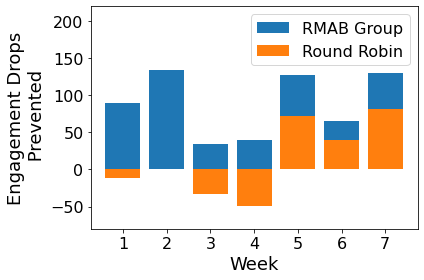

rmab [ 90 224 259 299 427 492 622]
round_robin [-11 -11 -44 -93 -21  19 101]


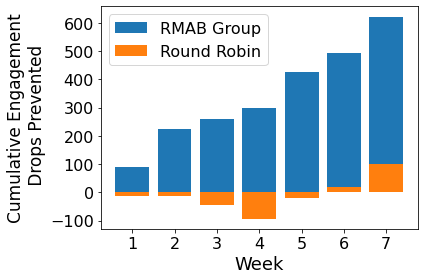

In [7]:
fig=plt.figure(figsize=(6,4))

label = dict(zip(['rmab','round_robin' ],['RMAB Group','Round Robin' ] ))
for pol in ['rmab','round_robin' ]:
    plt.bar(range(1,8), np.array(inst_engage_drops[pol])[1:8] - np.array(inst_engage_drops['control'])[1:8]
             , label=label[pol])
    print(pol, np.array(inst_engage_drops[pol])[1:6])
print('c', np.array(inst_engage_drops['control'])[1:6])
    
# plt.title('Weekly Engagement Drop Prevention')
plt.legend(fontsize=16)
plt.xlabel('Week', fontsize=18)
plt.ylabel('Engagement Drops\n Prevented', fontsize=18)
plt.ylim(-80, 220)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout() 
plt.show()
fig=plt.figure(figsize=(6,4))

for pol in ['rmab','round_robin' ]:
    plt.bar(range(1,8), np.array(cumm_engage_drops[pol])[1:8] - np.array(cumm_engage_drops['control'])[1:8]
             , label=label[pol])
    print(pol, np.array(cumm_engage_drops[pol])[1:8] - np.array(cumm_engage_drops['control'])[1:8])
#     print(pol, np.array(cumm_engage_drops[pol])[1:6] - np.array(cumm_engage_drops['control'])[1:6])
#     print(pol, np.array(cumm_engage_drops[pol])[1:6])
    
# plt.title('Cumulative Engagement Drop Prevention')
plt.legend(fontsize=16)
plt.xlabel('Week', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Cumulative Engagement\n Drops Prevented', fontsize=17)
plt.tight_layout() 



In [15]:
np.array(inst_engage_drops[pol])[1:8] - np.array(inst_engage_drops['control'])[1:8]

array([-11,   0, -33, -49,  72,  40,  82])

round_robin [-125 -216 -211 -360 -280]
c [-114 -216 -178 -311 -352]


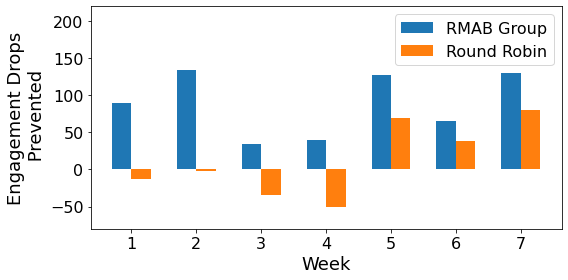

rmab [  -24  -106  -249  -520  -744 -1043 -1322]
rmab [ 90 224 259 299 427 492 622]
round_robin [ -125  -341  -552  -912 -1192 -1516 -1843]
round_robin [-11 -11 -44 -93 -21  19 101]
c [ -114  -330  -508  -819 -1171 -1535 -1944]


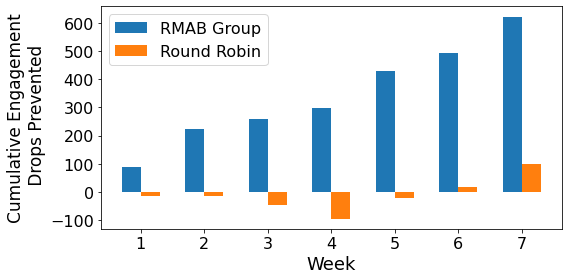

In [203]:
fig=plt.figure(figsize=(8,4))

label = dict(zip(['rmab','round_robin' ],['RMAB Group','Round Robin' ] ))

width = 0.3
pol='rmab'
plt.bar(np.arange(1,8)-width/2, np.array(inst_engage_drops[pol])[1:8] - np.array(inst_engage_drops['control'])[1:8]
         ,width=width, label=label[pol])

pol = 'round_robin'
plt.bar(np.arange(1,8)+width/2, np.array(inst_engage_drops[pol])[1:8] - np.array(inst_engage_drops['control'])[1:8]-2
         ,width=width, label=label[pol])
print(pol, np.array(inst_engage_drops[pol])[1:6])
print('c', np.array(inst_engage_drops['control'])[1:6])
    
# plt.title('Weekly Engagement Drop Prevention')
plt.legend(fontsize=16)
plt.xlabel('Week', fontsize=18)
plt.ylabel('Engagement Drops\n Prevented', fontsize=18)
plt.ylim(-80, 220)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout() 
plt.show()
fig=plt.figure(figsize=(8,4))

width = 0.3
pol='rmab'
plt.bar(np.arange(1,8)-width/2, np.array(cumm_engage_drops[pol])[1:8] - np.array(cumm_engage_drops['control'])[1:8]
         ,width=width, label=label[pol])
print(pol, np.array(cumm_engage_drops[pol])[1:8])
print(pol, np.array(cumm_engage_drops[pol])[1:8] - np.array(cumm_engage_drops['control'])[1:8])
pol = 'round_robin'
plt.bar(np.arange(1,8)+width/2, np.array(cumm_engage_drops[pol])[1:8] - np.array(cumm_engage_drops['control'])[1:8]-2
         ,width=width, label=label[pol])
print(pol, np.array(cumm_engage_drops[pol])[1:8])
print(pol, np.array(cumm_engage_drops[pol])[1:8] - np.array(cumm_engage_drops['control'])[1:8])

print('c', np.array(cumm_engage_drops['control'])[1:8])
    
# plt.title('Cumulative Engagement Drop Prevention')
plt.legend(fontsize=16)
plt.xlabel('Week', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Cumulative Engagement\n Drops Prevented', fontsize=17)
plt.tight_layout() 



In [205]:
1944-1322, 1843-1944

(622, -101)

In [129]:
rm =-1322/7668
rr = -1843/7668
c = -1944/7668
rmab_var = 2.52
rr_var = 2.56
c_var = 2.50

rmvsc = (rm-c)/c*100
rmvsrr = (rm-rr)/rr*100
rrvsc = (rr-c)/c*100
print('rmab vs con: ', rmvsc)
print('rmab vs rr:', rmvsrr)
print('rr vs con:', rrvsc)
print(rm)

rmab vs con:  -31.995884773662546
rmab vs rr: -28.269126424308194
rr vs con: -5.195473251028802
-0.17240479916536255


In [131]:
se_rm_rr = (rm/rr)*np.sqrt(rmab_var**2/rm**2+rr_var**2/rr**2)
# se_rm_c = (rm/c)*np.sqrt(rmab_var**2/rm**2+c_var**2/c**2)*100
# se_rr_c = (rr/c)*np.sqrt(c_var**2/c**2+rr_var**2/rr**2)*100
se_rm_rr

12.973116255362752

In [122]:
print('rmab vs rr', rmvsrr+1.65*se_rm_rr, rmvsrr-1.65*se_rm_rr)
print('rmab vs c', rmvsc+1.65*se_rm_c, rmvsc-1.65*se_rm_c)
print('rr vs c', rrvsc+1.65*se_rr_c, rrvsc-1.65*se_rr_c)


rmab vs rr 2112.295055710546 -2168.833308559162
rmab vs c 1946.4464373610238 -2010.4382069083488
rr vs c 2265.3675922316156 -2275.7585387336735


In [144]:
print(pol, np.array(cumm_engage_drops[pol])[1:8])
pol='rmab'
np.array(list(engagement_matrix[pol][:, :8].sum(axis=1)-(8)*engagement_matrix[pol][:, 0])+[0]*1000).std(), pol

rmab [  -24  -106  -249  -520  -744 -1043 -1322]


(2.376200427033373, 'rmab')

(array([   3.,   11.,  104.,  601., 1521., 2149., 1676.,  715.,  196.,
          24.]),
 array([-8.76959487, -7.20169092, -5.63378697, -4.06588301, -2.49797906,
        -0.93007511,  0.63782885,  2.2057328 ,  3.77363675,  5.34154071,
         6.90944466]),
 <BarContainer object of 10 artists>)

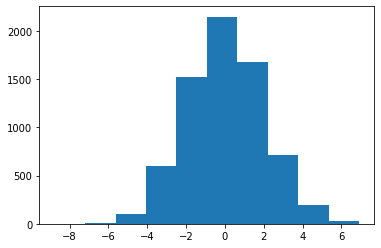

In [156]:
plt.hist(np.random.normal(0,2, 7000))

In [194]:
pol='round_robin'
pol='rmab'
pd.Series(((engagement_matrix[pol][:, :8].sum(axis=1)-(8)*engagement_matrix[pol][:, 0])>0).astype(int)).value_counts()

0    5845
1    1823
dtype: int64

In [195]:
5893/7668, 5845/7668

(0.7685185185185185, 0.7622587376108503)

In [199]:
pol='round_robin'
(engagement_matrix[pol][:, :8].sum(axis=1)-engagement_matrix[pol][:, 0]).sum()

23686

In [ ]:
23645, 23686


In [40]:
orng = (1.0, 0.4980392156862745, 0.054901960784313725, 1.0)
blu = (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)
gr = (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0)

In [7]:
for pol in ['control' , 'rmab','round_robin' ]:
    print(pol, engagement_matrix[pol][:, 0].sum())

control 3661
rmab 3571
round_robin 3647


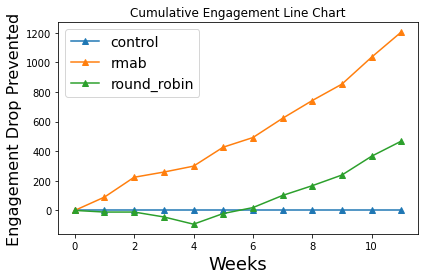

In [38]:
fig=plt.figure(figsize=(6,4))


for pol in ['control' , 'rmab','round_robin' ]:
    plt.plot(range(12), [engagement_matrix[pol][:, :week+1].sum()-engagement_matrix['control'][:, :week+1].sum() - (week+1)*(engagement_matrix[pol][:, 0].sum()-engagement_matrix['control'][:, 0].sum()) for week in range(12)],
             '-^', label=pol)

plt.title('Cumulative Engagement Line Chart')
plt.legend(fontsize=14)
plt.xlabel('Weeks', fontsize=18)
plt.ylabel('Engagement Drop Prevented', fontsize=16)
plt.tight_layout() 



        
        

In [59]:
(engagement_matrix[pol][:, :week+1].sum(axis=1)-(week+1)*engagement_matrix[pol][:, 0]).sum(), pol, week, cumm_engage_drops[pol][week]

(-3775, 'control', 11, -3775)

In [87]:
pd.Series(engagement_matrix['rmab'][:, :8].sum(axis=1)).value_counts()

0    2274
8    1554
1     782
7     666
2     572
6     480
3     463
5     449
4     428
dtype: int64

In [90]:
pd.Series(engagement_matrix['rmab'][:, :1].sum(axis=1)).value_counts()

0    4097
1    3571
dtype: int64

In [ ]:
np.random.uniform(-)

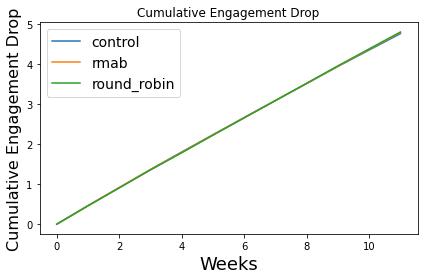

In [7]:
fig=plt.figure(figsize=(6,4))


for pol in ['control' , 'rmab','round_robin' ]:
    plt.errorbar(range(12), [(engagement_matrix[pol][:, :week+1].sum(axis=1) - engagement_matrix[pol][:, 0]).mean() for week in range(12)],
#                  yerr = [(engagement_matrix[pol][:, :week+1].sum(axis=1) - (week+1)*engagement_matrix[pol][:, 0]).std() for week in range(12)],
                 label=pol)

plt.title('Cumulative Engagement Drop')
plt.legend(fontsize=14)
plt.xlabel('Weeks', fontsize=18)
plt.ylabel('Cumulative Engagement Drop', fontsize=16)
plt.tight_layout() 



        
        

control ['week0: 3661', 'week1: 3547', 'week2: 3445', 'week3: 3483', 'week4: 3350', 'week5: 3309', 'week6: 3297', 'week7: 3252']
rmab ['week0: 3571', 'week1: 3547', 'week2: 3489', 'week3: 3428', 'week4: 3300', 'week5: 3347', 'week6: 3272', 'week7: 3292']
round_robin ['week0: 3647', 'week1: 3522', 'week2: 3431', 'week3: 3436', 'week4: 3287', 'week5: 3367', 'week6: 3323', 'week7: 3320']


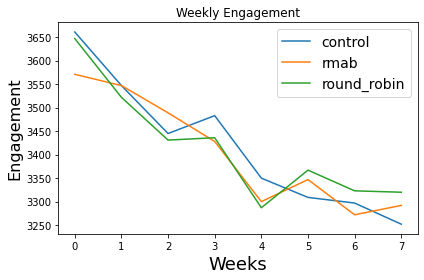

In [13]:
fig=plt.figure(figsize=(6,4))


for pol in ['control' , 'rmab','round_robin' ]:
    plt.plot(range(8), [engagement_matrix[pol][:, week].sum() for week in range(8)],
#                  yerr = [(engagement_matrix[pol][:, :week+1].sum(axis=1) - (week+1)*engagement_matrix[pol][:, 0]).std() for week in range(12)],
                 label=pol)
    print(pol, [f'week{week}: {engagement_matrix[pol][:, week].sum()}' for week in range(8)])

plt.title('Weekly Engagement')
plt.legend(fontsize=14)
plt.xlabel('Weeks', fontsize=18)
plt.ylabel('Engagement', fontsize=16)
plt.tight_layout() 



        
        

<BarContainer object of 3 artists>

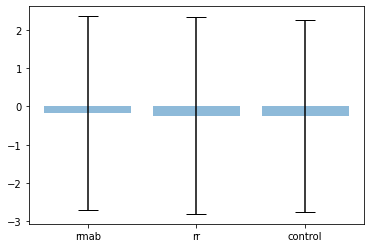

In [129]:
week = 7
plt.bar(['rmab', 'rr', 'control'], 
        [(engagement_matrix[pol][:, :week+1].sum(axis=1) - (week+1)*engagement_matrix[pol][:, 0]).mean() for pol in ['rmab', 'round_robin', 'control']],
       yerr = [(engagement_matrix[pol][:, :week+1].sum(axis=1) - (week+1)*engagement_matrix[pol][:, 0]).std() for pol in ['rmab', 'round_robin', 'control']],
        align='center', alpha=0.5, ecolor='black', capsize=10)

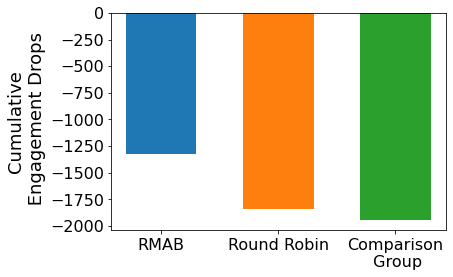

In [84]:
week = 7
plt.bar(['RMAB', 'Round Robin', 'Comparison\n Group'], 
        [(engagement_matrix[pol][:, :week+1].sum(axis=1) - (week+1)*engagement_matrix[pol][:, 0]).sum() for pol in ['rmab', 'round_robin', 'control']],
       align='center', alpha=1, ecolor='black', capsize=10, color = [ blu,orng, gr], width=0.6)
plt.ylabel('Cumulative\n Engagement Drops', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.ylim(-2100, 100)
# plt.margins(y=0.1)
plt.show()


In [68]:
help(plt.margins)

Help on function margins in module matplotlib.pyplot:

margins(*margins, x=None, y=None, tight=True)
    Set or retrieve autoscaling margins.
    
    The padding added to each limit of the axes is the *margin*
    times the data interval. All input parameters must be floats
    within the range [0, 1]. Passing both positional and keyword
    arguments is invalid and will raise a TypeError. If no
    arguments (positional or otherwise) are provided, the current
    margins will remain in place and simply be returned.
    
    Specifying any margin changes only the autoscaling; for example,
    if *xmargin* is not None, then *xmargin* times the X data
    interval will be added to each end of that interval before
    it is used in autoscaling.
    
    Parameters
    ----------
    *margins : float, optional
        If a single positional argument is provided, it specifies
        both margins of the x-axis and y-axis limits. If two
        positional arguments are provided, they will b

In [125]:
~df_fil.user_id.isin(all_dropped[f'week{week}'])

4        True
7        True
8        True
10       True
11       True
         ... 
22983    True
22988    True
22994    True
23000    True
23001    True
Name: user_id, Length: 7667, dtype: bool

7408 (7668,)
7406 (7668,)
7667 (7667,)
[-0.18196544276457882, -0.23075884418039427, -0.25355419329594364]
[-0.17240479916536255, -0.24034950443401149, -0.25355419329594364]
[2.5289551754792603, 2.5605978284182602, 2.504543690155104]
[2.525717509512708, 2.5619104119196194, 2.504543690155104]


<BarContainer object of 3 artists>

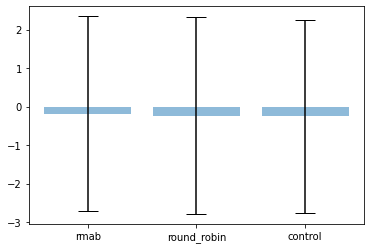

In [133]:
week = 7
filter_bool = {}
for pol in ['rmab', 'round_robin', 'control']:
    df_fil = df[df['arm']==pol]
    filter_bool[pol] = ~df_fil.user_id.isin(all_dropped[f'week{week}'])
    print(filter_bool[pol].sum(), filter_bool[pol].shape)
print([(engagement_matrix[pol][:, :week+1].sum(axis=1)[filter_bool[pol]] - (week+1)*engagement_matrix[pol][:, 0][filter_bool[pol]]).mean() for pol in ['rmab', 'round_robin', 'control']])
print([(engagement_matrix[pol][:, :week+1].sum(axis=1) - (week+1)*engagement_matrix[pol][:, 0]).mean() for pol in ['rmab', 'round_robin', 'control']])
print([(engagement_matrix[pol][:, :week+1].sum(axis=1)[filter_bool[pol]] - (week+1)*engagement_matrix[pol][:, 0][filter_bool[pol]]).std() for pol in ['rmab', 'round_robin', 'control']])
print([(engagement_matrix[pol][:, :week+1].sum(axis=1) - (week+1)*engagement_matrix[pol][:, 0]).std() for pol in ['rmab', 'round_robin', 'control']])

plt.bar(['rmab', 'round_robin', 'control'], 
        [(engagement_matrix[pol][:, :week+1].sum(axis=1)[filter_bool[pol]] - (week+1)*engagement_matrix[pol][:, 0][filter_bool[pol]]).mean() for pol in ['rmab', 'round_robin', 'control']],
        yerr = [(engagement_matrix[pol][:, :week+1].sum(axis=1)[filter_bool[pol]] - (week+1)*engagement_matrix[pol][:, 0][filter_bool[pol]]).std() for pol in ['rmab', 'round_robin', 'control']],
align='center', alpha=0.5, ecolor='black', capsize=10)


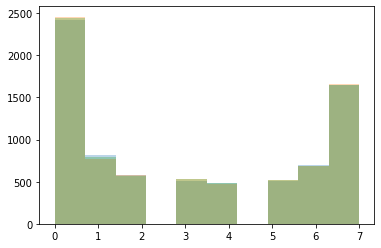

In [104]:
week=7
for pol in ['control' , 'rmab','round_robin' ]:
    plt.hist(engagement_matrix[pol][:, :week+1].sum(axis=1) - engagement_matrix[pol][:, 0], alpha=0.3)

In [106]:
(engagement_matrix[pol][:, :week+1].sum(axis=1) - engagement_matrix[pol][:, 0]).std()

2.8126452249379468

(array([4.000e+00, 1.000e+01, 5.700e+01, 9.200e+01, 1.490e+02, 6.164e+03,
        1.170e+02, 7.300e+01, 2.700e+01, 7.000e+00]),
 array([-9.11060205, -7.3550765 , -5.59955095, -3.8440254 , -2.08849985,
        -0.3329743 ,  1.42255125,  3.1780768 ,  4.93360235,  6.6891279 ,
         8.44465346]),
 <BarContainer object of 10 artists>)

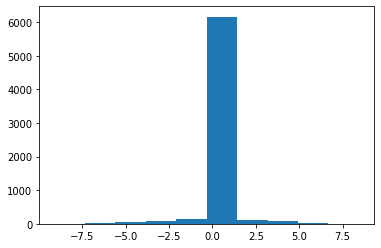

In [112]:
plt.hist(list(np.random.normal(0, 3, 700))+list([0]*6000))

In [113]:
np.array(list(np.random.normal(0, 3, 700))+list([0]*6000)).std(), np.array(list(np.random.normal(0,3, 700))+list([0]*6000)).mean()

(1.023825045546748, 0.007223711948159472)

In [114]:
with open('drop_list.pickle', 'rb') as handle:
    all_dropped = pickle.load(handle)

In [115]:
all_dropped

{'week1': {2385643,
  2385670,
  2385731,
  2385799,
  2385824,
  2385845,
  2385948,
  2385949,
  2386000,
  2386015,
  2386031,
  2386088,
  2386112,
  2386194,
  2386203,
  2386209,
  2386246,
  2386253,
  2386268,
  2386276,
  2386284,
  2386325,
  2386329,
  2386341,
  2386347,
  2386360,
  2386383,
  2386418,
  2386459,
  2386507,
  2386541,
  2386543,
  2386596,
  2386602,
  2386628,
  2386737,
  2386748,
  2386874,
  2386887,
  2386960,
  2386977,
  2387000,
  2387008,
  2387061,
  2387185,
  2387192,
  2387254,
  2387268,
  2387280,
  2387289,
  2387292,
  2387417,
  2387448,
  2387495,
  2387527,
  2387581,
  2387584,
  2387618,
  2387634,
  2387635,
  2387661,
  2387996,
  2388232,
  2388240,
  2388299,
  2388453,
  2388495,
  2388506,
  2388514,
  2388579,
  2388702,
  2388715,
  2388778,
  2388805,
  2388818,
  2388842,
  2388859,
  2388865,
  2388884,
  2388895,
  2388908,
  2388918,
  2388992,
  2389001,
  2389090,
  2389143,
  2389145,
  2389150,
  2389155,
  2389171,
 

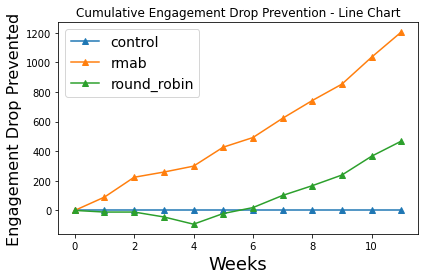

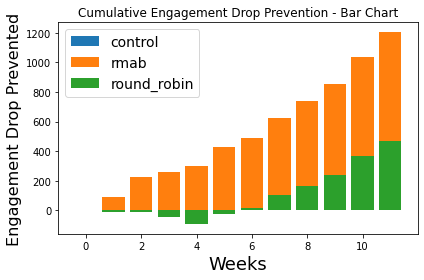

In [5]:
fig=plt.figure(figsize=(6,4))


for pol in ['control' , 'rmab','round_robin' ]:
    plt.plot(range(12), np.array(cumm_engage_drops[pol]) - np.array(cumm_engage_drops['control']),
             '-^', label=pol)

plt.title('Cumulative Engagement Drop Prevention - Line Chart')
plt.legend(fontsize=14)
plt.xlabel('Weeks', fontsize=18)
plt.ylabel('Engagement Drop Prevented', fontsize=16)
plt.tight_layout() 



fig=plt.figure(figsize=(6,4))

for pol in ['control' , 'rmab','round_robin' ]:
    plt.bar(range(12), np.array(cumm_engage_drops[pol]) - np.array(cumm_engage_drops['control']),
             label=pol)

plt.title('Cumulative Engagement Drop Prevention - Bar Chart')

plt.legend(fontsize=14)
plt.xlabel('Weeks', fontsize=18)
plt.ylabel('Engagement Drop Prevented', fontsize=16)
plt.tight_layout() 

        
        

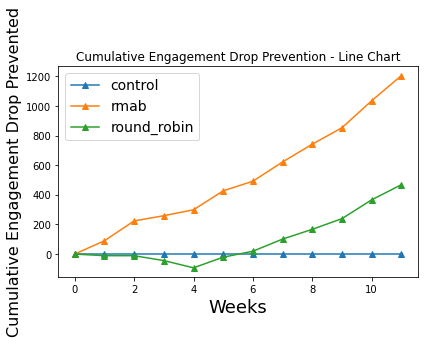

In [35]:
fig=plt.figure(figsize=(6,4))


for pol in ['control' , 'rmab','round_robin' ]:
    plt.plot(range(12), np.array(cumm_engage_drops[pol]) - np.array(cumm_engage_drops['control']),
             '-^', label=pol)

plt.title('Cumulative Engagement Drop Prevention - Line Chart')
plt.legend(fontsize=14)
plt.xlabel('Weeks', fontsize=18)
plt.ylabel('Cumulative Engagement Drop Prevented', fontsize=16)
plt.tight_layout() 


fig=plt.figure(figsize=(6,4))


for pol in ['control' , 'rmab','round_robin' ]:
    plt.plot(range(12), np.array(cumm_engage_drops[pol]) - np.array(cumm_engage_drops['control']),
             '-^', label=pol)

plt.title('Cumulative Engagement Drop Prevention - Line Chart')
plt.legend(fontsize=14)
plt.xlabel('Weeks', fontsize=18)
plt.ylabel('Cumulative Engagement Drop Prevented', fontsize=16)
plt.tight_layout() 

In [40]:
cumm_engage_drops[pol]

[0, -125, -341, -552, -912, -1192, -1516, -1843, -2180, -2494, -2889, -3307]

control [('week 0', 0), ('week 1', -114), ('week 2', -330), ('week 3', -508), ('week 4', -819), ('week 5', -1171), ('week 6', -1535), ('week 7', -1944), ('week 8', -2347), ('week 9', -2733), ('week 10', -3255), ('week 11', -3775)]
rmab [('week 0', 0), ('week 1', -24), ('week 2', -106), ('week 3', -249), ('week 4', -520), ('week 5', -744), ('week 6', -1043), ('week 7', -1322), ('week 8', -1605), ('week 9', -1880), ('week 10', -2220), ('week 11', -2570)]
round_robin [('week 0', 0), ('week 1', -125), ('week 2', -341), ('week 3', -552), ('week 4', -912), ('week 5', -1192), ('week 6', -1516), ('week 7', -1843), ('week 8', -2180), ('week 9', -2494), ('week 10', -2889), ('week 11', -3307)]


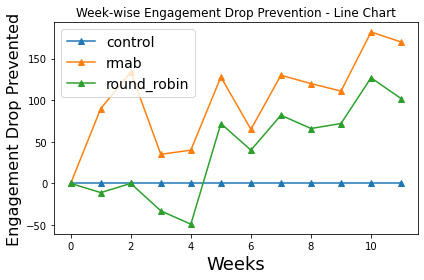

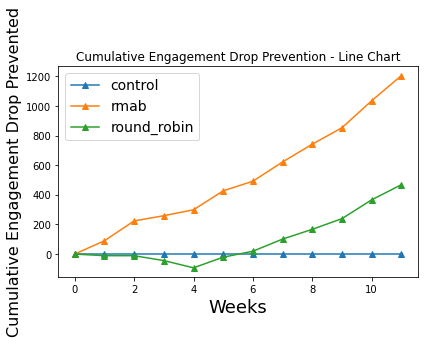

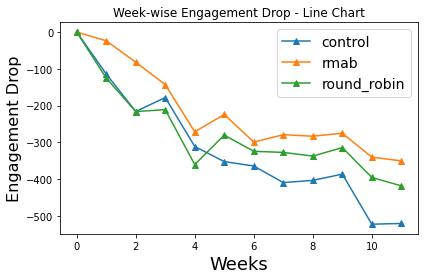

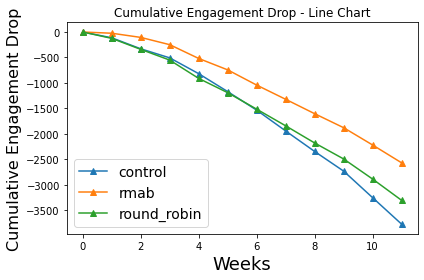

In [31]:
fig=plt.figure(figsize=(6,4))


for pol in ['control' , 'rmab','round_robin' ]:
    plt.plot(range(12), np.array(inst_engage_drops[pol]) - np.array(inst_engage_drops['control']),
             '-^', label=pol)
    
plt.title('Week-wise Engagement Drop Prevention - Line Chart')
plt.legend(fontsize=14)
plt.xlabel('Weeks', fontsize=18)
plt.ylabel('Engagement Drop Prevented', fontsize=16)
plt.tight_layout() 


fig=plt.figure(figsize=(6,4))


for pol in ['control' , 'rmab','round_robin' ]:
    plt.plot(range(12), np.array(cumm_engage_drops[pol]) - np.array(cumm_engage_drops['control']),
             '-^', label=pol)

plt.title('Cumulative Engagement Drop Prevention - Line Chart')
plt.legend(fontsize=14)
plt.xlabel('Weeks', fontsize=18)
plt.ylabel('Cumulative Engagement Drop Prevented', fontsize=16)
plt.tight_layout() 



fig=plt.figure(figsize=(6,4))


for pol in ['control' , 'rmab','round_robin' ]:
    plt.plot(range(12), np.array(inst_engage_drops[pol]),
             '-^', label=pol)

plt.title('Week-wise Engagement Drop - Line Chart')
plt.legend(fontsize=14)
plt.xlabel('Weeks', fontsize=18)
plt.ylabel('Engagement Drop', fontsize=16)
plt.tight_layout() 



fig=plt.figure(figsize=(6,4))


for pol in ['control' , 'rmab','round_robin' ]:
    plt.plot(range(12), np.array(cumm_engage_drops[pol]),
             '-^', label=pol)
    print(pol, [(f'week {idx}', i) for idx, i in enumerate(np.array(cumm_engage_drops[pol]))])

plt.title('Cumulative Engagement Drop - Line Chart')
plt.legend(fontsize=14)
plt.xlabel('Weeks', fontsize=18)
plt.ylabel('Cumulative Engagement Drop', fontsize=16)
plt.tight_layout() 









In [34]:
# 1171 - c
# 1192 - rr
# 744 - rmab

(1171-744)/1171*100, (1192-744)/1192*100

# c = -1944
# rr = -1843
# rmab = -1322



(36.46456020495303, 37.58389261744966)

In [34]:
(1322-1944)/1944, (1322-1843)/1843

(-0.31995884773662553, -0.28269126424308194)

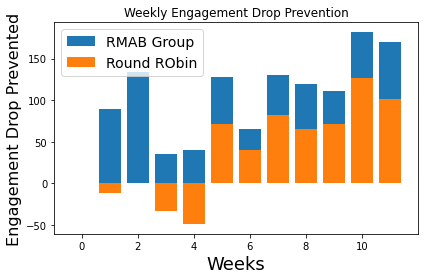

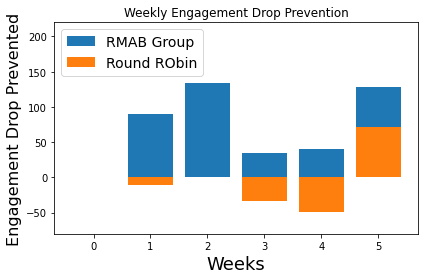

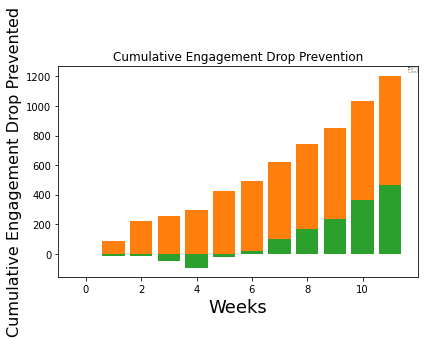

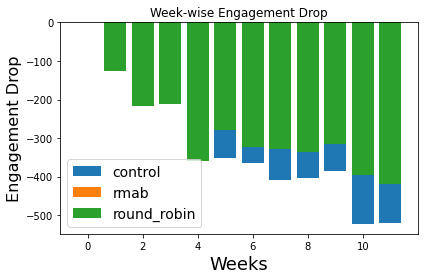

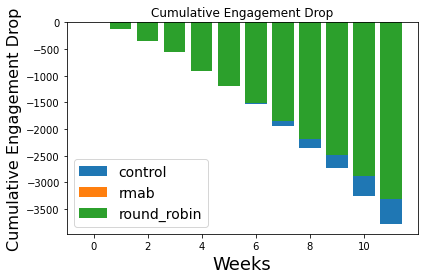

In [54]:
fig=plt.figure(figsize=(6,4))

label_dict = dict(zip(['control' , 'rmab','round_robin' ], ['Control', 'RMAB Group', 'Round RObin']))

for pol in [ 'rmab','round_robin' ]:
    plt.bar(range(12), np.array(inst_engage_drops[pol]) - np.array(inst_engage_drops['control']),
              label=label_dict[pol])
    
plt.title('Weekly Engagement Drop Prevention')
plt.legend(fontsize=14)
plt.xlabel('Weeks', fontsize=18)
plt.ylabel('Engagement Drop Prevented', fontsize=16)
plt.tight_layout() 

fig=plt.figure(figsize=(6,4))

label_dict = dict(zip(['control' , 'rmab','round_robin' ], ['Control', 'RMAB Group', 'Round RObin']))

for pol in [ 'rmab','round_robin' ]:
    plt.bar(range(6), np.array(inst_engage_drops[pol])[:6] - np.array(inst_engage_drops['control'])[:6],
              label=label_dict[pol])
    
plt.title('Weekly Engagement Drop Prevention')
plt.legend(fontsize=14, loc=2)
plt.xlabel('Weeks', fontsize=18)
plt.ylabel('Engagement Drop Prevented', fontsize=16)
plt.ylim(-80, 220)
plt.tight_layout() 


fig=plt.figure(figsize=(6,4))


for pol in ['control' , 'rmab','round_robin' ]:
    plt.bar(range(12), np.array(cumm_engage_drops[pol]) - np.array(cumm_engage_drops['control']),
              label=pol)

plt.title('Cumulative Engagement Drop Prevention')
plt.legend(fontsize=1)
plt.xlabel('Weeks', fontsize=18)
plt.ylabel('Cumulative Engagement Drop Prevented', fontsize=16)
plt.tight_layout() 



fig=plt.figure(figsize=(6,4))

for pol in ['control' , 'rmab','round_robin' ]:
    plt.bar(range(12), np.array(inst_engage_drops[pol]),
              label=pol)

plt.title('Week-wise Engagement Drop')
plt.legend(fontsize=14)
plt.xlabel('Weeks', fontsize=18)
plt.ylabel('Engagement Drop', fontsize=16)
plt.tight_layout() 



fig=plt.figure(figsize=(6,4))


for pol in ['control' , 'rmab','round_robin' ]:
    plt.bar(range(12), np.array(cumm_engage_drops[pol]),
              label=pol)

plt.title('Cumulative Engagement Drop')
plt.legend(fontsize=14)
plt.xlabel('Weeks', fontsize=18)
plt.ylabel('Cumulative Engagement Drop', fontsize=16)
plt.tight_layout() 









In [40]:
engagement_df = pd.DataFrame(columns=['control' , 'rmab','round_robin' ])
for pol in engagement_df.columns:
    engagement_df[pol] = engagement_matrix[pol].sum(axis=0)
engagement_df.index = [f'week {i}' for i in range(12)]
engagement_df

,control,rmab,round_robin
week 0,3661,3571,3647
week 1,3547,3547,3522
week 2,3445,3489,3431
week 3,3483,3428,3436
week 4,3350,3300,3287
week 5,3309,3347,3367
week 6,3297,3272,3323
week 7,3252,3292,3320
week 8,3258,3288,3310
week 9,3275,3296,3333


[  0 101 134  68  89  56  25  48  54  39  55  68]


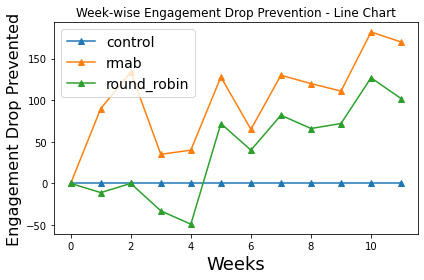

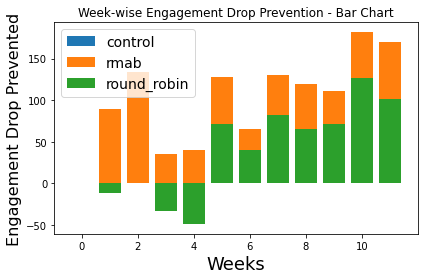

In [24]:
fig=plt.figure(figsize=(6,4))


for pol in ['control' , 'rmab','round_robin' ]:
    plt.plot(range(12), np.array(inst_engage_drops[pol]) - np.array(inst_engage_drops['control']),
             '-^', label=pol)
#     plt.plot(range(12), np.array(inst_engage_drops[pol]),
#              '-^', label=pol+' abs')
print(np.array(inst_engage_drops['rmab']) - np.array(inst_engage_drops['round_robin']))
plt.title('Week-wise Engagement Drop Prevention - Line Chart')
plt.legend(fontsize=14)
plt.xlabel('Weeks', fontsize=18)
plt.ylabel('Engagement Drop Prevented', fontsize=16)
plt.tight_layout() 



fig=plt.figure(figsize=(6,4))

for pol in ['control' , 'rmab','round_robin' ]:
    plt.bar(range(12), np.array(inst_engage_drops[pol]) - np.array(inst_engage_drops['control']),
             label=pol)

plt.title('Week-wise Engagement Drop Prevention - Bar Chart')

plt.legend(fontsize=14)
plt.xlabel('Weeks', fontsize=18)
plt.ylabel('Engagement Drop Prevented', fontsize=16)
plt.tight_layout() 

        
        

Policy  rmab
	 Week Wise [  0  90 134  35  40 128  65 130 120 111 182 170]
	 Cumulative  [   0   90  224  259  299  427  492  622  742  853 1035 1205]
Policy  round_robin
	 Week Wise [  0 -11   0 -33 -49  72  40  82  66  72 127 102]
	 Cumulative  [  0 -11 -11 -44 -93 -21  19 101 167 239 366 468]


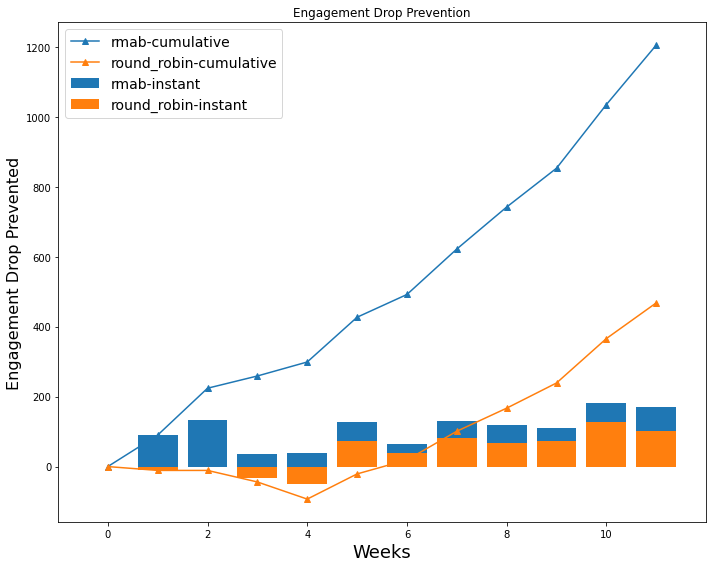

In [25]:


fig=plt.figure(figsize=(10,8))

for pol in ['rmab','round_robin' ]:
    plt.bar(range(12), np.array(inst_engage_drops[pol]) - np.array(inst_engage_drops['control']),
             label=f'{pol}-instant')
    plt.plot(range(12), np.array(cumm_engage_drops[pol]) - np.array(cumm_engage_drops['control']),
         '-^', label=f'{pol}-cumulative')
    print('Policy ', pol)
    print('\t Week Wise', np.array(inst_engage_drops[pol]) - np.array(inst_engage_drops['control']))
    print('\t Cumulative ', np.array(cumm_engage_drops[pol]) - np.array(cumm_engage_drops['control']))


plt.title('Engagement Drop Prevention')

plt.legend(fontsize=14)
plt.xlabel('Weeks', fontsize=18)
plt.ylabel('Engagement Drop Prevented', fontsize=16)
plt.tight_layout() 

        
        

In [206]:
interv_df

NameError: name 'interv_df' is not defined

In [26]:
reg = pd.read_csv('feb16-mar15_data/beneficiary/ai_registration-20210216-20210315.csv', sep='\t')
call = pd.read_csv('feb16-mar15_data/call/older/call_data_week_1.csv', sep='\t')


In [27]:
interv_df = pd.DataFrame(columns=['user_id', 'intervene_week', 'intervene_date', 'exp_group'])
interv_calling_files = ['250_week1_290421', '400_week2_060521', '400_week3_120521', '400_week4_180521', '435_week5_240521', '600_week6_310521', '700_week7_070621', '1000_week8_140621', '1000_week9_210621', '1000_week10_280621', '1000_week11_050721']

from datetime import datetime
week_date_lookup = {f.split('_')[1]:datetime.strptime(f.split('_')[-1], '%d%m%y') for f in interv_calling_files}

for file in interv_calling_files:
    with open('outputs/pilot_generations/calling_list_{}.txt'.format(file), 'r') as fr:
        for line in fr:
            user_id = int(line.strip())
            interv_week = file.split('_')[1]
            exp_group = df[df['user_id']==user_id]['arm'].iloc[0]
            intervene_date = week_date_lookup[interv_week]
            interv_df = interv_df.append({'user_id': user_id, 'intervene_week': interv_week, 'intervene_date':intervene_date, 'exp_group': exp_group}, ignore_index=True)
interv_df = pd.merge(interv_df, reg[['user_id', 'registration_date']])  
interv_df['registration_date'] = pd.to_datetime(interv_df['registration_date'])

In [28]:
interv_df['days_since_reg'] = (interv_df['intervene_date'] - interv_df['registration_date']).dt.days
display(interv_df)
display(interv_df.groupby(['intervene_week', 'exp_group']).count())

,user_id,intervene_week,intervene_date,exp_group,registration_date,days_since_reg
0,2393699,week1,2021-04-29,rmab,2021-02-25,63
1,2387277,week1,2021-04-29,round_robin,2021-02-01,87
2,2401025,week1,2021-04-29,rmab,2021-03-03,57
3,2401025,week3,2021-05-12,rmab,2021-03-03,70
4,2401025,week4,2021-05-18,rmab,2021-03-03,76
...,...,...,...,...,...,...
7180,2395228,week11,2021-07-05,round_robin,2021-02-22,133
7181,2395195,week11,2021-07-05,round_robin,2021-02-23,132
7182,2392191,week11,2021-07-05,round_robin,2021-02-22,133
7183,2394510,week11,2021-07-05,round_robin,2021-02-23,132


user_id  intervene_date  registration_date  \
intervene_week exp_group                                                 
week1          rmab             125             125                125   
               round_robin      125             125                125   
week10         rmab             500             500                500   
               round_robin      500             500                500   
week11         rmab             500             500                500   
               round_robin      500             500                500   
week2          rmab             200             200                200   
               round_robin      200             200                200   
week3          rmab             200             200                200   
               round_robin      200             200                200   
week4          rmab             200             200                200   
               round_robin      200             200                200   
week5          rmab             235             235                235   
               round_robin      200             200                200   
week6          rmab             300             300                300   
               round_robin      300             300                300   
week7          rmab             350             350                350   
               round_robin      350             350                350   
week8          rmab             500             500                500   
               round_robin      500             500                500   
week9          rmab             500             500                500   
               round_robin      500             500                500   

                            days_since_reg  
intervene_week exp_group                    
week1          rmab                    125  
               round_robin             125  
week10         rmab                    500  
               round_robin             500  
week11         rmab                    500  
               round_robin             500  
week2          rmab                    200  
               round_robin             200  
week3          rmab                    200  
               round_robin             200  
week4          rmab                    200  
               round_robin             200  
week5          rmab                    235  
               round_robin             200  
week6          rmab                    300  
               round_robin             300  
week7          rmab                    350  
               round_robin             350  
week8          rmab                    500  
               round_robin             500  
week9          rmab                    500  
               round_robin             500

In [29]:
interv_df['exp_group'].unique()

array(['rmab', 'round_robin'], dtype=object)

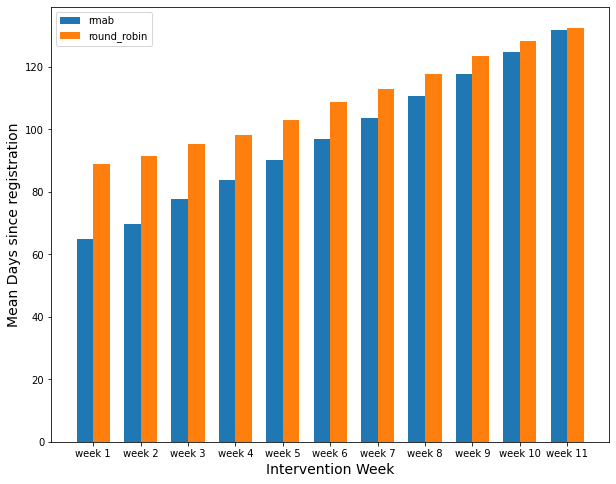

In [30]:
width = 0.35
weeks = [f'week{i+1}' for i in range(11)]
plt.figure(figsize=(10, 8))
exp_group = 'rmab'
mean_days_since_reg = interv_df[interv_df['exp_group'] == exp_group].groupby('intervene_week')['days_since_reg'].mean()
plt.bar(np.arange(len(mean_days_since_reg))-width/2, mean_days_since_reg.loc[weeks].values, width, label = exp_group)

exp_group = 'round_robin'
mean_days_since_reg = interv_df[interv_df['exp_group'] == exp_group].groupby('intervene_week')['days_since_reg'].mean()
plt.bar(np.arange(len(mean_days_since_reg))+width/2, mean_days_since_reg.loc[weeks].values, width, label = exp_group)

plt.xticks([i for i in range(len(mean_days_since_reg))],
          [f'week {i+1}' for i in range(len(mean_days_since_reg))])

plt.xlabel('Intervention Week', fontsize=14)
plt.ylabel('Mean Days since registration', fontsize=14)
plt.legend()

plt.show()

In [31]:
interv_df[interv_df['exp_group'] == 'round_robin'].groupby('intervene_week')['registration_date'].agg({'min','max'})


,min,max
intervene_week,,
week1,2021-01-20,2021-02-02
week10,2021-02-18,2021-02-22
week11,2021-02-22,2021-02-23
week2,2021-02-02,2021-02-05
week3,2021-01-20,2021-02-08
week4,2021-02-08,2021-02-09
week5,2021-02-09,2021-02-11
week6,2021-02-11,2021-02-12
week7,2021-02-12,2021-02-15


In [32]:
for i in range(10):
    print(f'week{i+1}')
    print(interv_df[(interv_df['exp_group'] == 'round_robin') & (interv_df['intervene_week']==f'week{i+1}')]['registration_date'].value_counts())
    print()

week1
2021-02-01    46
2021-02-02    31
2021-01-29    14
2021-01-28    13
2021-01-25     8
2021-01-20     5
2021-01-27     3
2021-01-30     3
2021-01-22     2
Name: registration_date, dtype: int64

week2
2021-02-05    65
2021-02-02    50
2021-02-04    43
2021-02-03    42
Name: registration_date, dtype: int64

week3
2021-02-08    111
2021-02-07     26
2021-02-06     25
2021-02-01     12
2021-02-02      6
2021-01-28      5
2021-01-29      3
2021-01-27      2
2021-01-20      2
2021-01-30      2
2021-02-05      2
2021-01-22      2
2021-01-25      2
Name: registration_date, dtype: int64

week4
2021-02-09    143
2021-02-08     57
Name: registration_date, dtype: int64

week5
2021-02-10    165
2021-02-11     23
2021-02-09     12
Name: registration_date, dtype: int64

week6
2021-02-11    197
2021-02-12    103
Name: registration_date, dtype: int64

week7
2021-02-15    182
2021-02-13     83
2021-02-12     52
2021-02-14     33
Name: registration_date, dtype: int64

week8
2021-02-16    352
2021-02-

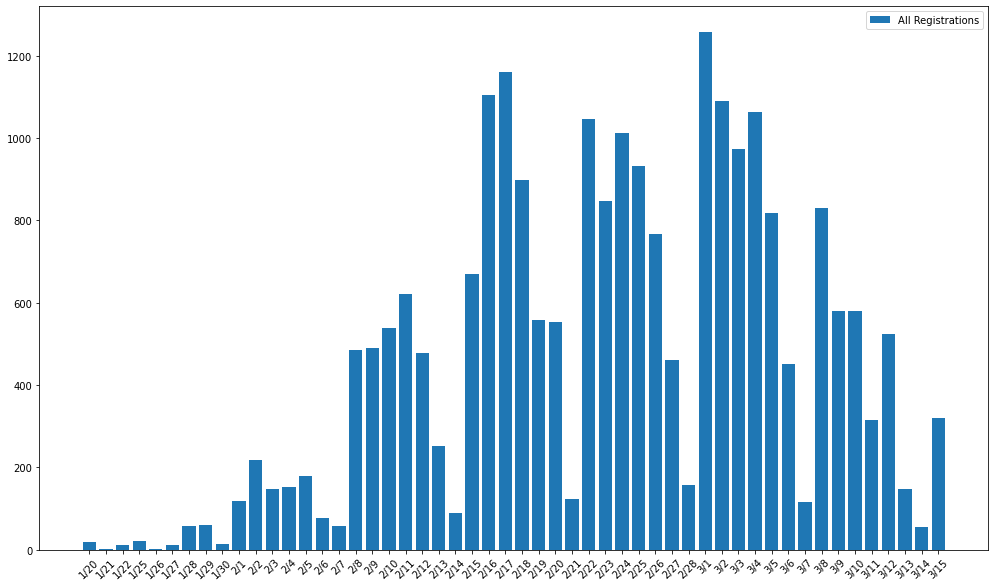

In [33]:
reg_grps = reg.groupby('registration_date')['user_id'].count()


dates = pd.to_datetime(reg_grps.index).month.astype(str) + ['/']*len(reg_grps)+ pd.to_datetime(reg_grps.index).day.astype(str)
plt.figure(figsize=(17, 10))
plt.xticks(rotation=45)
plt.bar(dates, reg_grps.values, label = 'All Registrations')
plt.legend()
plt.show()


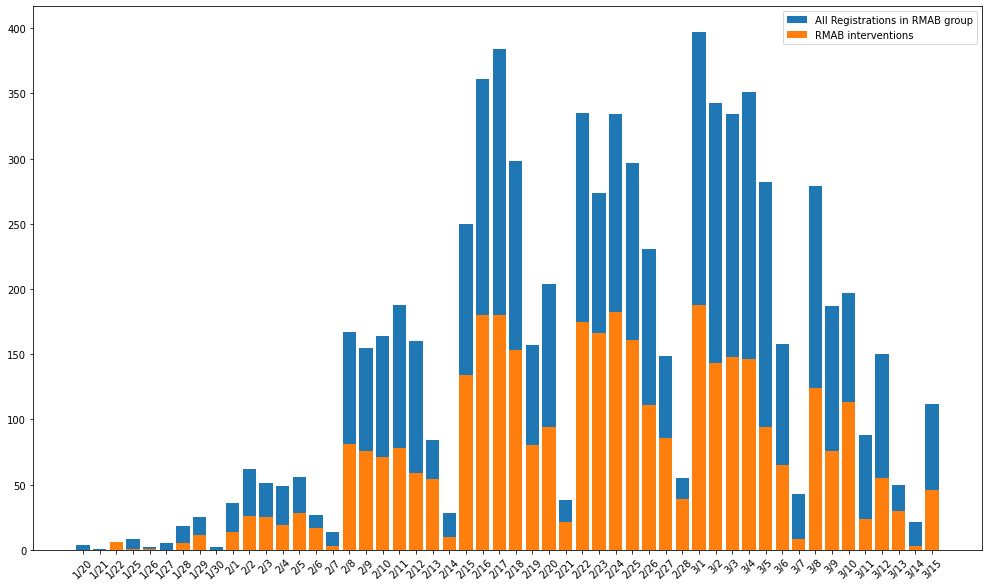

In [34]:
reg_rmab_grps = reg[reg['user_id'].isin(df[df['arm']=='rmab']['user_id'].values)].groupby('registration_date')['user_id'].count()


dates = pd.to_datetime(reg_rmab_grps.index).month.astype(str) + ['/']*len(reg_rmab_grps)+ pd.to_datetime(reg_rmab_grps.index).day.astype(str)
plt.figure(figsize=(17, 10))
plt.xticks(rotation=45)
plt.bar(dates, reg_rmab_grps.values, label = 'All Registrations in RMAB group')

rmab_cnts = interv_df[interv_df['exp_group']=='rmab'].groupby('registration_date')['user_id'].count()

rmab_dates = pd.to_datetime(rmab_cnts.index).month.astype(str) + ['/']*len(rmab_cnts)+ pd.to_datetime(rmab_cnts.index).day.astype(str)
plt.bar(rmab_dates, rmab_cnts.values, label='RMAB interventions')

plt.legend()
plt.show()

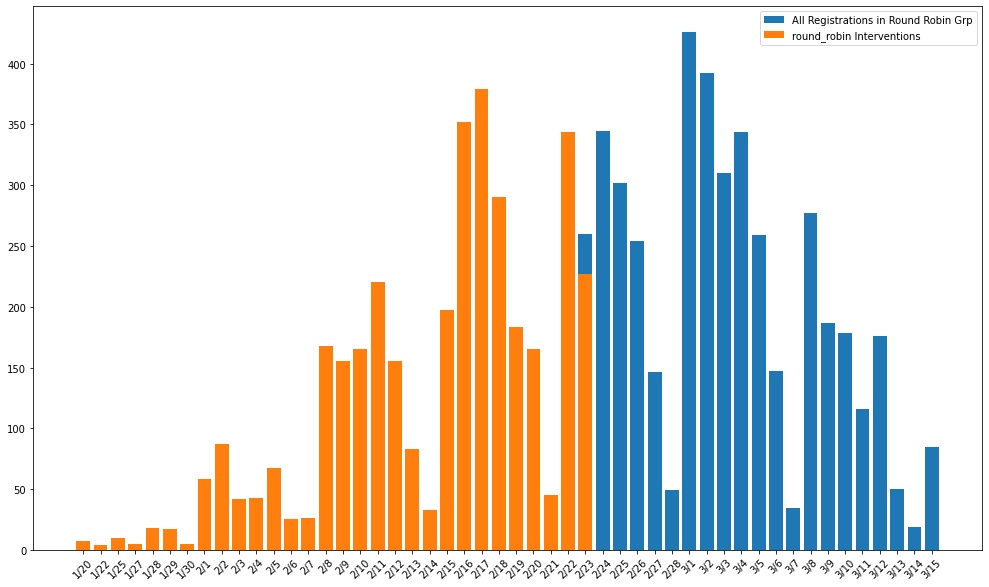

In [35]:
reg_round_robin_grps = reg[reg['user_id'].isin(df[df['arm']=='round_robin']['user_id'].values)].groupby('registration_date')['user_id'].count()


dates = pd.to_datetime(reg_round_robin_grps.index).month.astype(str) + ['/']*len(reg_round_robin_grps)+ pd.to_datetime(reg_round_robin_grps.index).day.astype(str)
plt.figure(figsize=(17, 10))
plt.xticks(rotation=45)
plt.bar(dates, reg_round_robin_grps.values, label = 'All Registrations in Round Robin Grp')

round_robin_cnts = interv_df[interv_df['exp_group']=='round_robin'].groupby('registration_date')['user_id'].count()

round_robin_dates = pd.to_datetime(round_robin_cnts.index).month.astype(str) + ['/']*len(round_robin_cnts)+ pd.to_datetime(round_robin_cnts.index).day.astype(str)
plt.bar(round_robin_dates, round_robin_cnts.values, label='round_robin Interventions')

plt.legend()
plt.show()


In [36]:
round_robin_cnts.sum()/ reg_round_robin_grps.sum(), rmab_cnts.sum()/ reg_rmab_grps.sum()

(0.46622326551904014, 0.47078768909754826)

In [219]:
pd.read_csv('outputs/individual_clustering/weekly_kmeans_pilot_stats_40.csv')

,Unnamed: 0,user_id,whittle_index,cluster,start_state,lstm_prediction,gold_e2c,gold_label,registration_date,current_E2C
0,8497,2394384,0.865692,29,NE,high_engagement,0.200000,low_engagement,1144.0,0.473684
1,3173,2388891,0.865692,29,NE,low_engagement,NaN,low_engagement,1134.0,0.000000
2,18131,2404208,0.865692,29,NE,high_engagement,1.000000,high_engagement,1158.0,1.000000
3,3213,2388931,0.865692,29,NE,low_engagement,0.111111,low_engagement,1144.0,0.277778
4,6366,2392202,0.865692,29,NE,high_engagement,NaN,low_engagement,1137.0,NaN
...,...,...,...,...,...,...,...,...,...,...
22998,14451,2400463,-0.882812,34,NE,low_engagement,NaN,low_engagement,1157.0,0.166667
22999,12040,2398012,-0.882812,34,NE,low_engagement,0.200000,low_engagement,1155.0,0.071429
23000,11519,2397484,-0.882812,34,NE,high_engagement,NaN,low_engagement,1142.0,0.000000
23001,11574,2397539,-0.882812,34,NE,high_engagement,0.400000,low_engagement,1151.0,0.500000
